<a href="https://colab.research.google.com/github/pankajroy97/HamoyeHQ/blob/main/HDSC_STAGE_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings

import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error


from google.colab import drive
from google.colab import files


uploaded = files.upload()
warnings.simplefilter(action="ignore", category=FutureWarning)

Saving Time_series_analysis_and_forecast_DATASET.csv to Time_series_analysis_and_forecast_DATASET (3).csv


In [ ]:
fc= pd.read_csv(io.BytesIO(uploaded['Time_series_analysis_and_forecast_DATASET (3).csv']))
fc.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [ ]:
fc.columns

Index(['FullDate', 'Tmax', 'SysLoad', 'GasPrice', 'ElecPrice'], dtype='object')

In [ ]:
fc["FullDate"] = pd.to_datetime(fc["FullDate"])
fc.set_index( "FullDate" , inplace= True )
fc.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [ ]:
fc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92016 entries, 2010-09-01 00:00:00 to 2021-02-28 23:00:00
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tmax       92016 non-null  float64
 1   SysLoad    92016 non-null  float64
 2   GasPrice   92016 non-null  float64
 3   ElecPrice  92016 non-null  float64
dtypes: float64(4)
memory usage: 3.5 MB


In [ ]:
fc.shape

(92016, 4)

In [ ]:
fc.columns

Index(['Tmax', 'SysLoad', 'GasPrice', 'ElecPrice'], dtype='object')

In [ ]:
fc.isnull().sum()

Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [ ]:
# Resampling hourly, daily, monthly, weekly

# hourly
fc_hourly =fc.resample('H').mean()

# daily
fc_daily =fc.resample('D').mean()

# weekly
fc_weekly=fc.resample('W').mean()


# monthly
fc_monthly=fc.resample('M').mean()

In [ ]:
print(fc_hourly .shape)
print(fc_daily.shape)
print(fc_weekly.shape)
print(fc_monthly.shape)

(92016, 4)
(3834, 4)
(548, 4)
(126, 4)


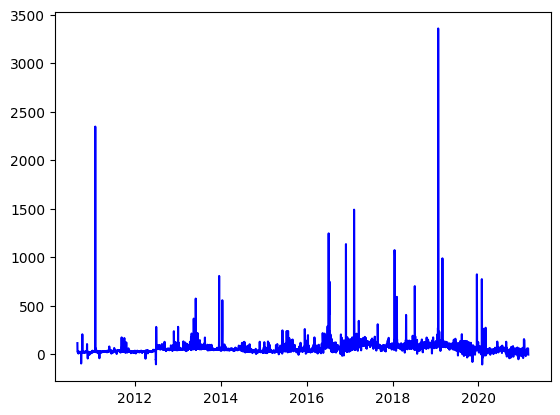

In [ ]:
# Plotting the daily sampled data
daily_pic = (fc_daily['ElecPrice'])
plt.plot(daily_pic , 'blue');

In [ ]:
# Resampling the data again daily and summing it
daily_fc = fc.resample('D')
new_fc = daily_fc.sum()
new_fc = new_fc.reset_index()
new_fc.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [ ]:
adf_result = adfuller(new_fc[ 'SysLoad'])

print(f'p-value: {adf_result[ 1 ]}')

p-value: 0.004253725504574063


In [ ]:
adf_result = adfuller(new_fc[ 'GasPrice'])

print(f'p-value: {adf_result[ 1 ]}')

p-value: 0.04502721288462552


In [ ]:
adf_result = adfuller(new_fc[ 'GasPrice'])

print( 'Critical Values:' )
for k, v in adf_result[ 4 ].items():
    print( f' {k} : {v} ' )

Critical Values:
 1% : -3.4320693157877544 
 5% : -2.8622996992165364 
 10% : -2.5671743978048323 


In [ ]:
adf_result = adfuller(new_fc[ 'ElecPrice'])

print( 'Critical Values:' )
for k, v in adf_result[ 4 ].items():
    print( f' {k} : {v} ' )

Critical Values:
 1% : -3.432066157296446 
 5% : -2.8622983040036005 
 10% : -2.5671736550459663 


In [ ]:
# Selecting ElecPrice column for univariate time series modelling
new_data = new_fc[['FullDate','ElecPrice']]
new_data =new_data.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
new_data.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [ ]:
# Splitting the dataset into train and test sets respectively
fc_train = new_data.iloc[0:2757]
fc_test  = new_data.iloc[2757:]

In [ ]:
fc_train.shape, fc_test.shape

((2757, 2), (1077, 2))

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
#fit to model
model = Prophet(daily_seasonality=True)
model.fit(fc_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmph6c0x0gh/cg0gcttn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph6c0x0gh/d1xdyqdw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21428', 'data', 'file=/tmp/tmph6c0x0gh/cg0gcttn.json', 'init=/tmp/tmph6c0x0gh/d1xdyqdw.json', 'output', 'file=/tmp/tmph6c0x0gh/prophet_modeltj69yifk/prophet_model-20230731195258.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:52:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:53:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Predicting the values of the test set
forecast = model.predict(fc_test)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,4195.663907,147.435018,4966.895080,4195.663907,4195.663907,-1667.564559,-1667.564559,-1667.564559,-1512.024664,...,9.752462,9.752462,9.752462,-165.292357,-165.292357,-165.292357,0.0,0.0,0.0,2528.099348
1,2018-03-21,4196.456032,305.744989,5073.069597,4196.456032,4196.456032,-1515.064810,-1515.064810,-1515.064810,-1512.024664,...,159.341363,159.341363,159.341363,-162.381508,-162.381508,-162.381508,0.0,0.0,0.0,2681.391222
2,2018-03-22,4197.248157,397.119950,5141.419785,4197.248157,4197.248157,-1416.830197,-1416.830197,-1416.830197,-1512.024664,...,257.106308,257.106308,257.106308,-161.911841,-161.911841,-161.911841,0.0,0.0,0.0,2780.417960
3,2018-03-23,4198.040282,81.324367,4950.200085,4198.040282,4198.040282,-1625.472449,-1625.472449,-1625.472449,-1512.024664,...,50.269801,50.269801,50.269801,-163.717587,-163.717587,-163.717587,0.0,0.0,0.0,2572.567833
4,2018-03-24,4198.832407,-116.663370,4606.315229,4198.832407,4198.832407,-1951.033790,-1951.033790,-1951.033790,-1512.024664,...,-271.452699,-271.452699,-271.452699,-167.556427,-167.556427,-167.556427,0.0,0.0,0.0,2247.798617


In [ ]:
# Calculating the RMSE by comparing the real values and the forecasted values
mse_prophet = mean_squared_error(fc_test.y,forecast.yhat)
print (f"The RMSE for prophet is {np.sqrt(mse_prophet):.2f}")

The RMSE for prophet is 3207.19


In [ ]:
# Calculating the MAPE
true = fc_test['y']
pred = forecast['yhat']

def MAPE(true, pred):
    true, pred = np.array(true), np.array(pred)
    return np.mean(np.abs((true - pred) / true)) * 100

MAPE(true, pred)


544.1394518069661

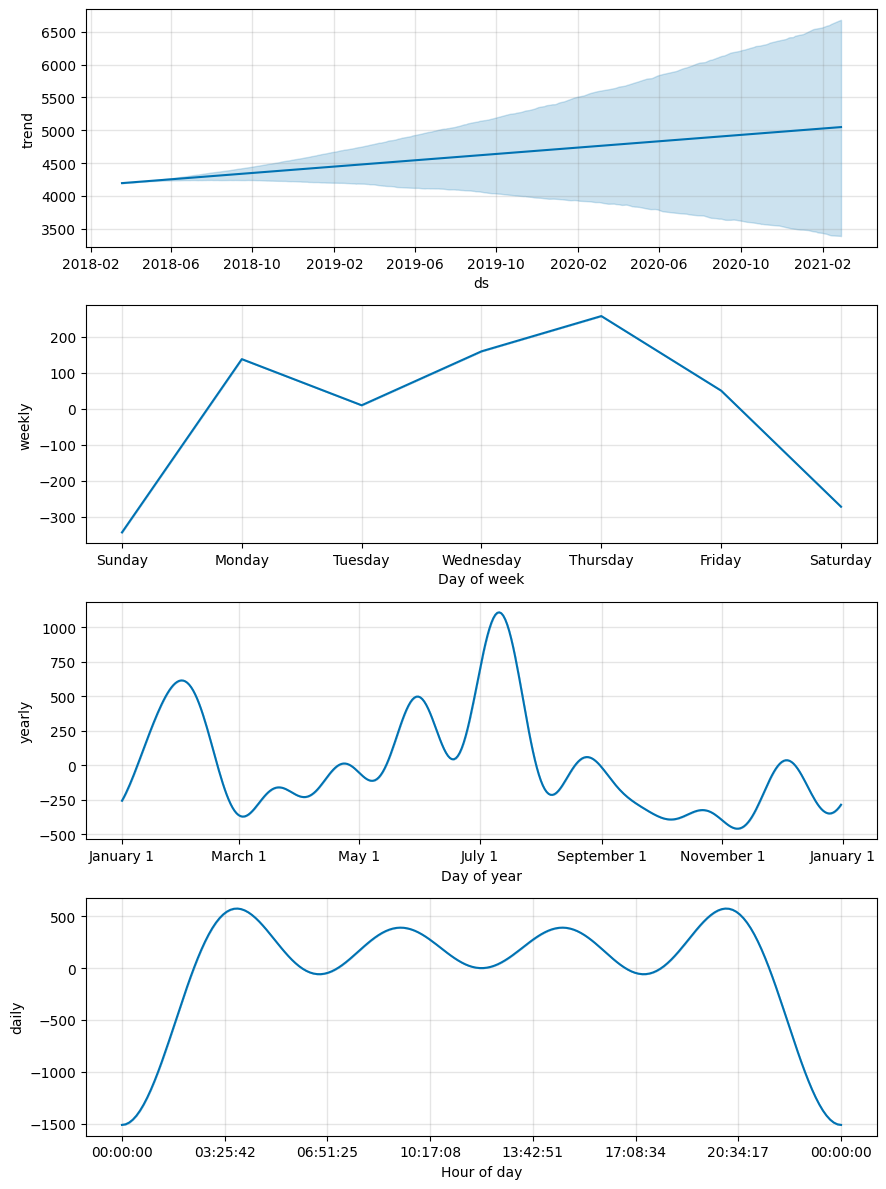

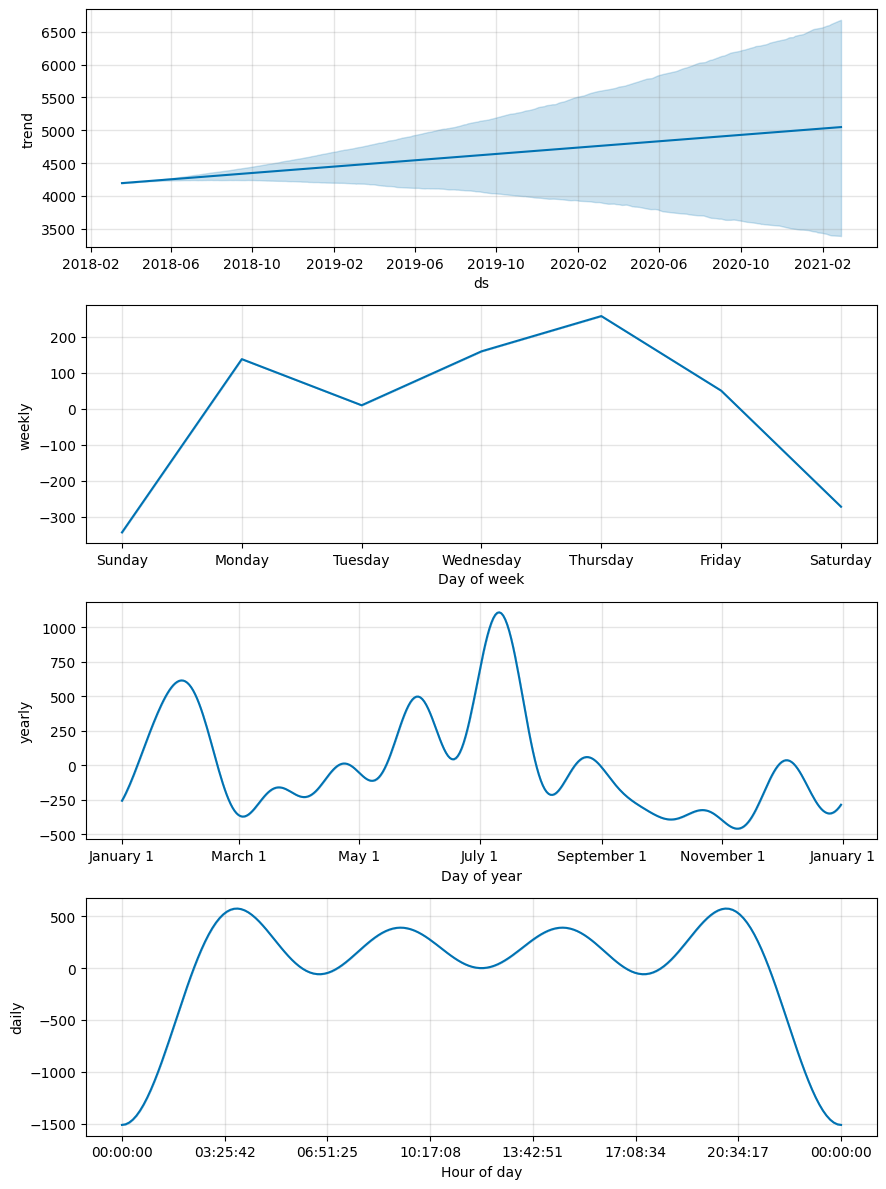

In [ ]:
# Plotting forecast components
model.plot_components(forecast)

In [ ]:
# using the univariate data
new_data.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [ ]:
new_data["add1"] = new_fc['SysLoad']
new_data["add2"] = new_fc['Tmax']
new_data["add3"] = new_fc['GasPrice']

In [ ]:
new_data.head()

,ds,y,add1,add2,add3
0,2010-09-01,2751.700,41565.380,379.2,88.56
1,2010-09-02,570.810,38898.990,369.6,88.56
2,2010-09-03,504.975,41665.760,439.2,106.80
3,2010-09-04,502.275,35638.085,328.8,81.36
4,2010-09-05,500.555,35611.410,357.6,106.80


In [ ]:
# Splitting the dataset into train and test sets respectively
fc_train = new_data.iloc[0:2757]
fc_test  = new_data.iloc[2757:]

In [ ]:
ml = Prophet()

In [ ]:
# Adding the other independent variables as regressors
ml.add_regressor('add1')
ml.add_regressor('add2')
ml.add_regressor('add3')

ml.fit(fc_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph6c0x0gh/4i6as0tn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph6c0x0gh/mabeu5d2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67775', 'data', 'file=/tmp/tmph6c0x0gh/4i6as0tn.json', 'init=/tmp/tmph6c0x0gh/mabeu5d2.json', 'output', 'file=/tmp/tmph6c0x0gh/prophet_model1sw0x5b5/prophet_model-20230731195539.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:55:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:55:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Predicting the test set
forecast1 = ml.predict(fc_test)
forecast1.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,1865.204282,-103.245091,4103.020852,1865.204282,1865.204282,-856.253614,-856.253614,-856.253614,0.234389,...,-84.494538,-84.494538,-84.494538,-38.857060,-38.857060,-38.857060,0.0,0.0,0.0,1986.140088
1,2018-03-21,1865.891589,25.443352,4269.768916,1865.891589,1865.891589,-1026.241961,-1026.241961,-1026.241961,0.231608,...,42.479487,42.479487,42.479487,-29.571833,-29.571833,-29.571833,0.0,0.0,0.0,1977.544546
2,2018-03-22,1866.578897,724.240262,4980.122018,1866.578897,1866.578897,-214.927695,-214.927695,-214.927695,0.218133,...,145.618830,145.618830,145.618830,-24.542320,-24.542320,-24.542320,0.0,0.0,0.0,2897.701501
3,2018-03-23,1867.266204,411.776339,4858.834276,1867.266204,1867.266204,-274.857277,-274.857277,-274.857277,0.210219,...,-44.306420,-44.306420,-44.306420,-23.627175,-23.627175,-23.627175,0.0,0.0,0.0,2581.863394
4,2018-03-24,1867.953512,-923.262746,3568.045319,1867.953512,1867.953512,-1076.279917,-1076.279917,-1076.279917,0.208294,...,-117.532133,-117.532133,-117.532133,-26.575669,-26.575669,-26.575669,0.0,0.0,0.0,1434.816566


In [ ]:
# Calculating the RMSE by comparing the real values and the forecasted values
mse_prophet = mean_squared_error(fc_test.y,forecast1.yhat)
print (f"The RMSE for prophet is {np.sqrt(mse_prophet):.2f}")

The RMSE for prophet is 2707.16


In [ ]:
# Calculating the MAPE
true = fc_test['y']
pred = forecast1['yhat']

def MAPE(true, pred):
    true, pred = np.array(true), np.array(pred)
    return np.mean(np.abs((true - pred) / true)) * 100

MAPE(true, pred)

231.4801729222889

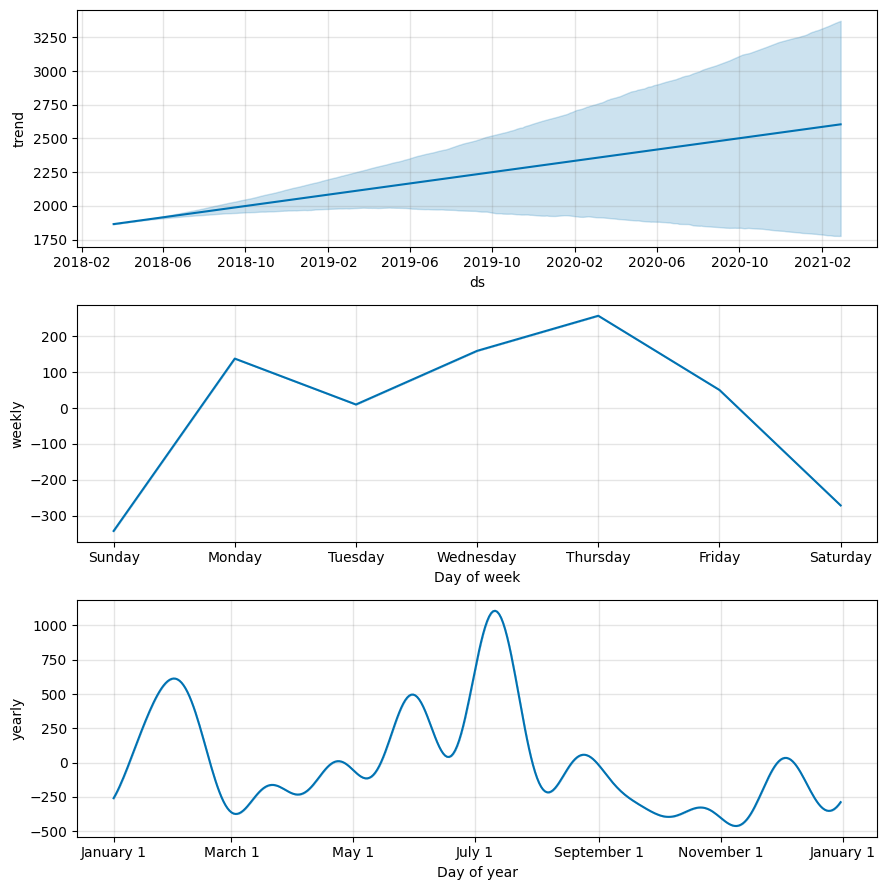

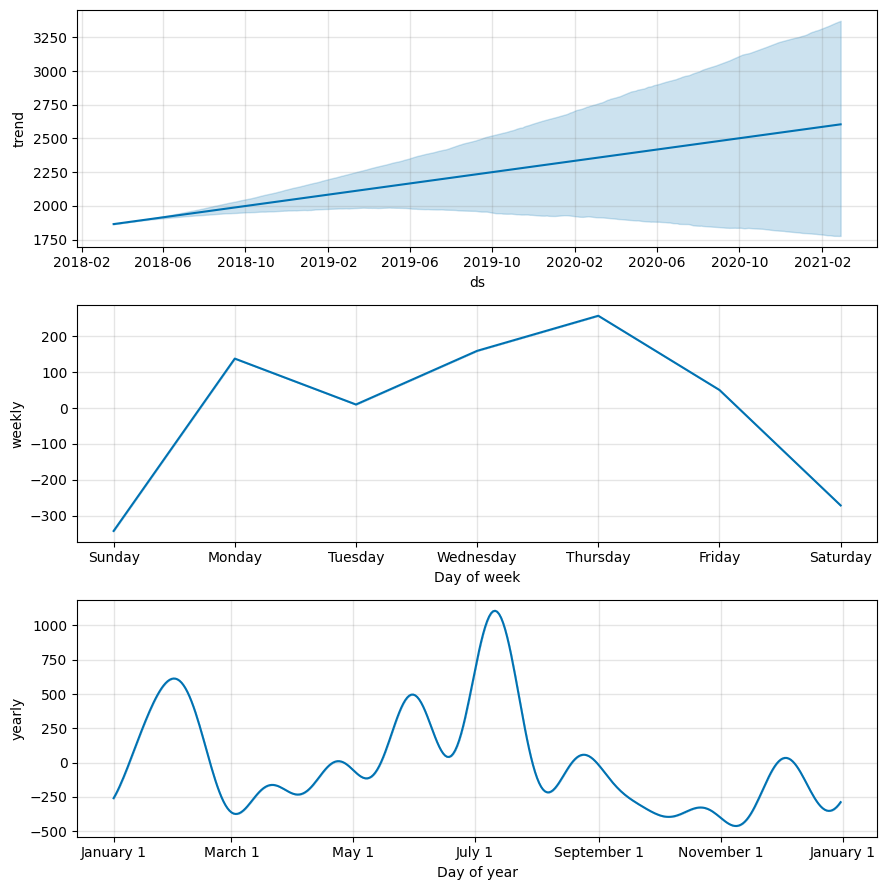

In [ ]:
# Plotting the multivariate forecast components
model.plot_components(forecast1)